# Assignment 2

Submitted by : Ng ao yang

## King county
-For this problem, we use only 1 output variable (price)
- Prepare the data and perform necessary feature engineering
- Create **_at least two models_** 
- Evaluate the models and pick the best candidate
- Form some conclusions

## Defining the predicting task. What is the meaning of the output variable ?
Using machine learning tools to predict the price of the respective houses in king county, and find out which features have alot of significance in affecting the price of a house.


# 0. importing modules
These few blocks of codes is to import necessary modules used later on.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import platform


message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.20.3
Numpy version=1.16.2
Pandas version=0.23.4
Matplotlib version=3.0.0
Python version=3.6.6


In [2]:
#importing numpy and pandas, seaborn

import numpy as np #linear algebra
import pandas as pd #datapreprocessing, CSV file I/O
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt

# 1.0 Data Importing¶
import data into the variables 

In [3]:
data = pd.read_csv('kc_house_data.csv')

In [4]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

# 2.0 Exploratory Data Analysis

In this section, we will try to analyse and explore the data,and play around with it, to get familiarise and find out more about the data 

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [10]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [193]:
data.shape

(21613, 21)

In [194]:
c = data.corr(method="pearson")


In [195]:
c

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above     0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.006338 -0.059121   
waterfront       0.072075       0.080588 -0.026161      0.092885  0.030285   
view             0.167649       0.276947 -0.053440      0.103917  0.084827   
condition       -0.158214       0.174105 -0.361417     -0.060618  0.

In [196]:
top2 = c.nlargest(2, 'price').index


In [197]:
top2

Index(['price', 'sqft_living'], dtype='object')

In [198]:
top10 = c.nlargest(10,'price').index


In [199]:
top10

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat'],
      dtype='object')

In [200]:
data.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [201]:
data.columns.values


array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [202]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [203]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text xticklabel objects>)

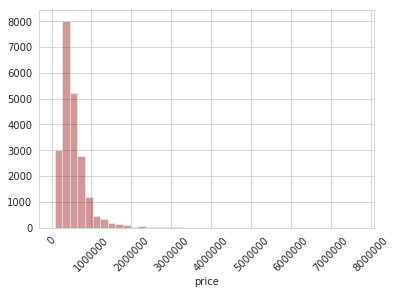

In [205]:
sns.distplot(data['price'],kde=False,color='darkred',bins=40)
plt.xticks(rotation=45)


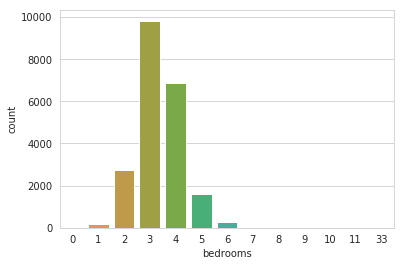

In [206]:
sns.countplot(x="bedrooms",data=data)
#tells me how many people had siblings on the ship with them

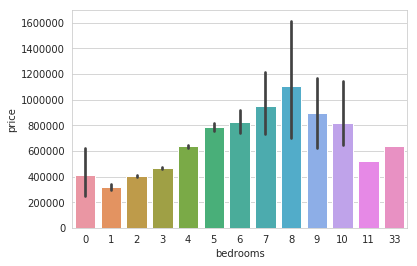

In [208]:
ax = sns.barplot(x="bedrooms", y="price", data=data)


In [209]:
data['sqft_above'].min()

290

In [210]:
data['sqft_above'].max()

9410

In [211]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

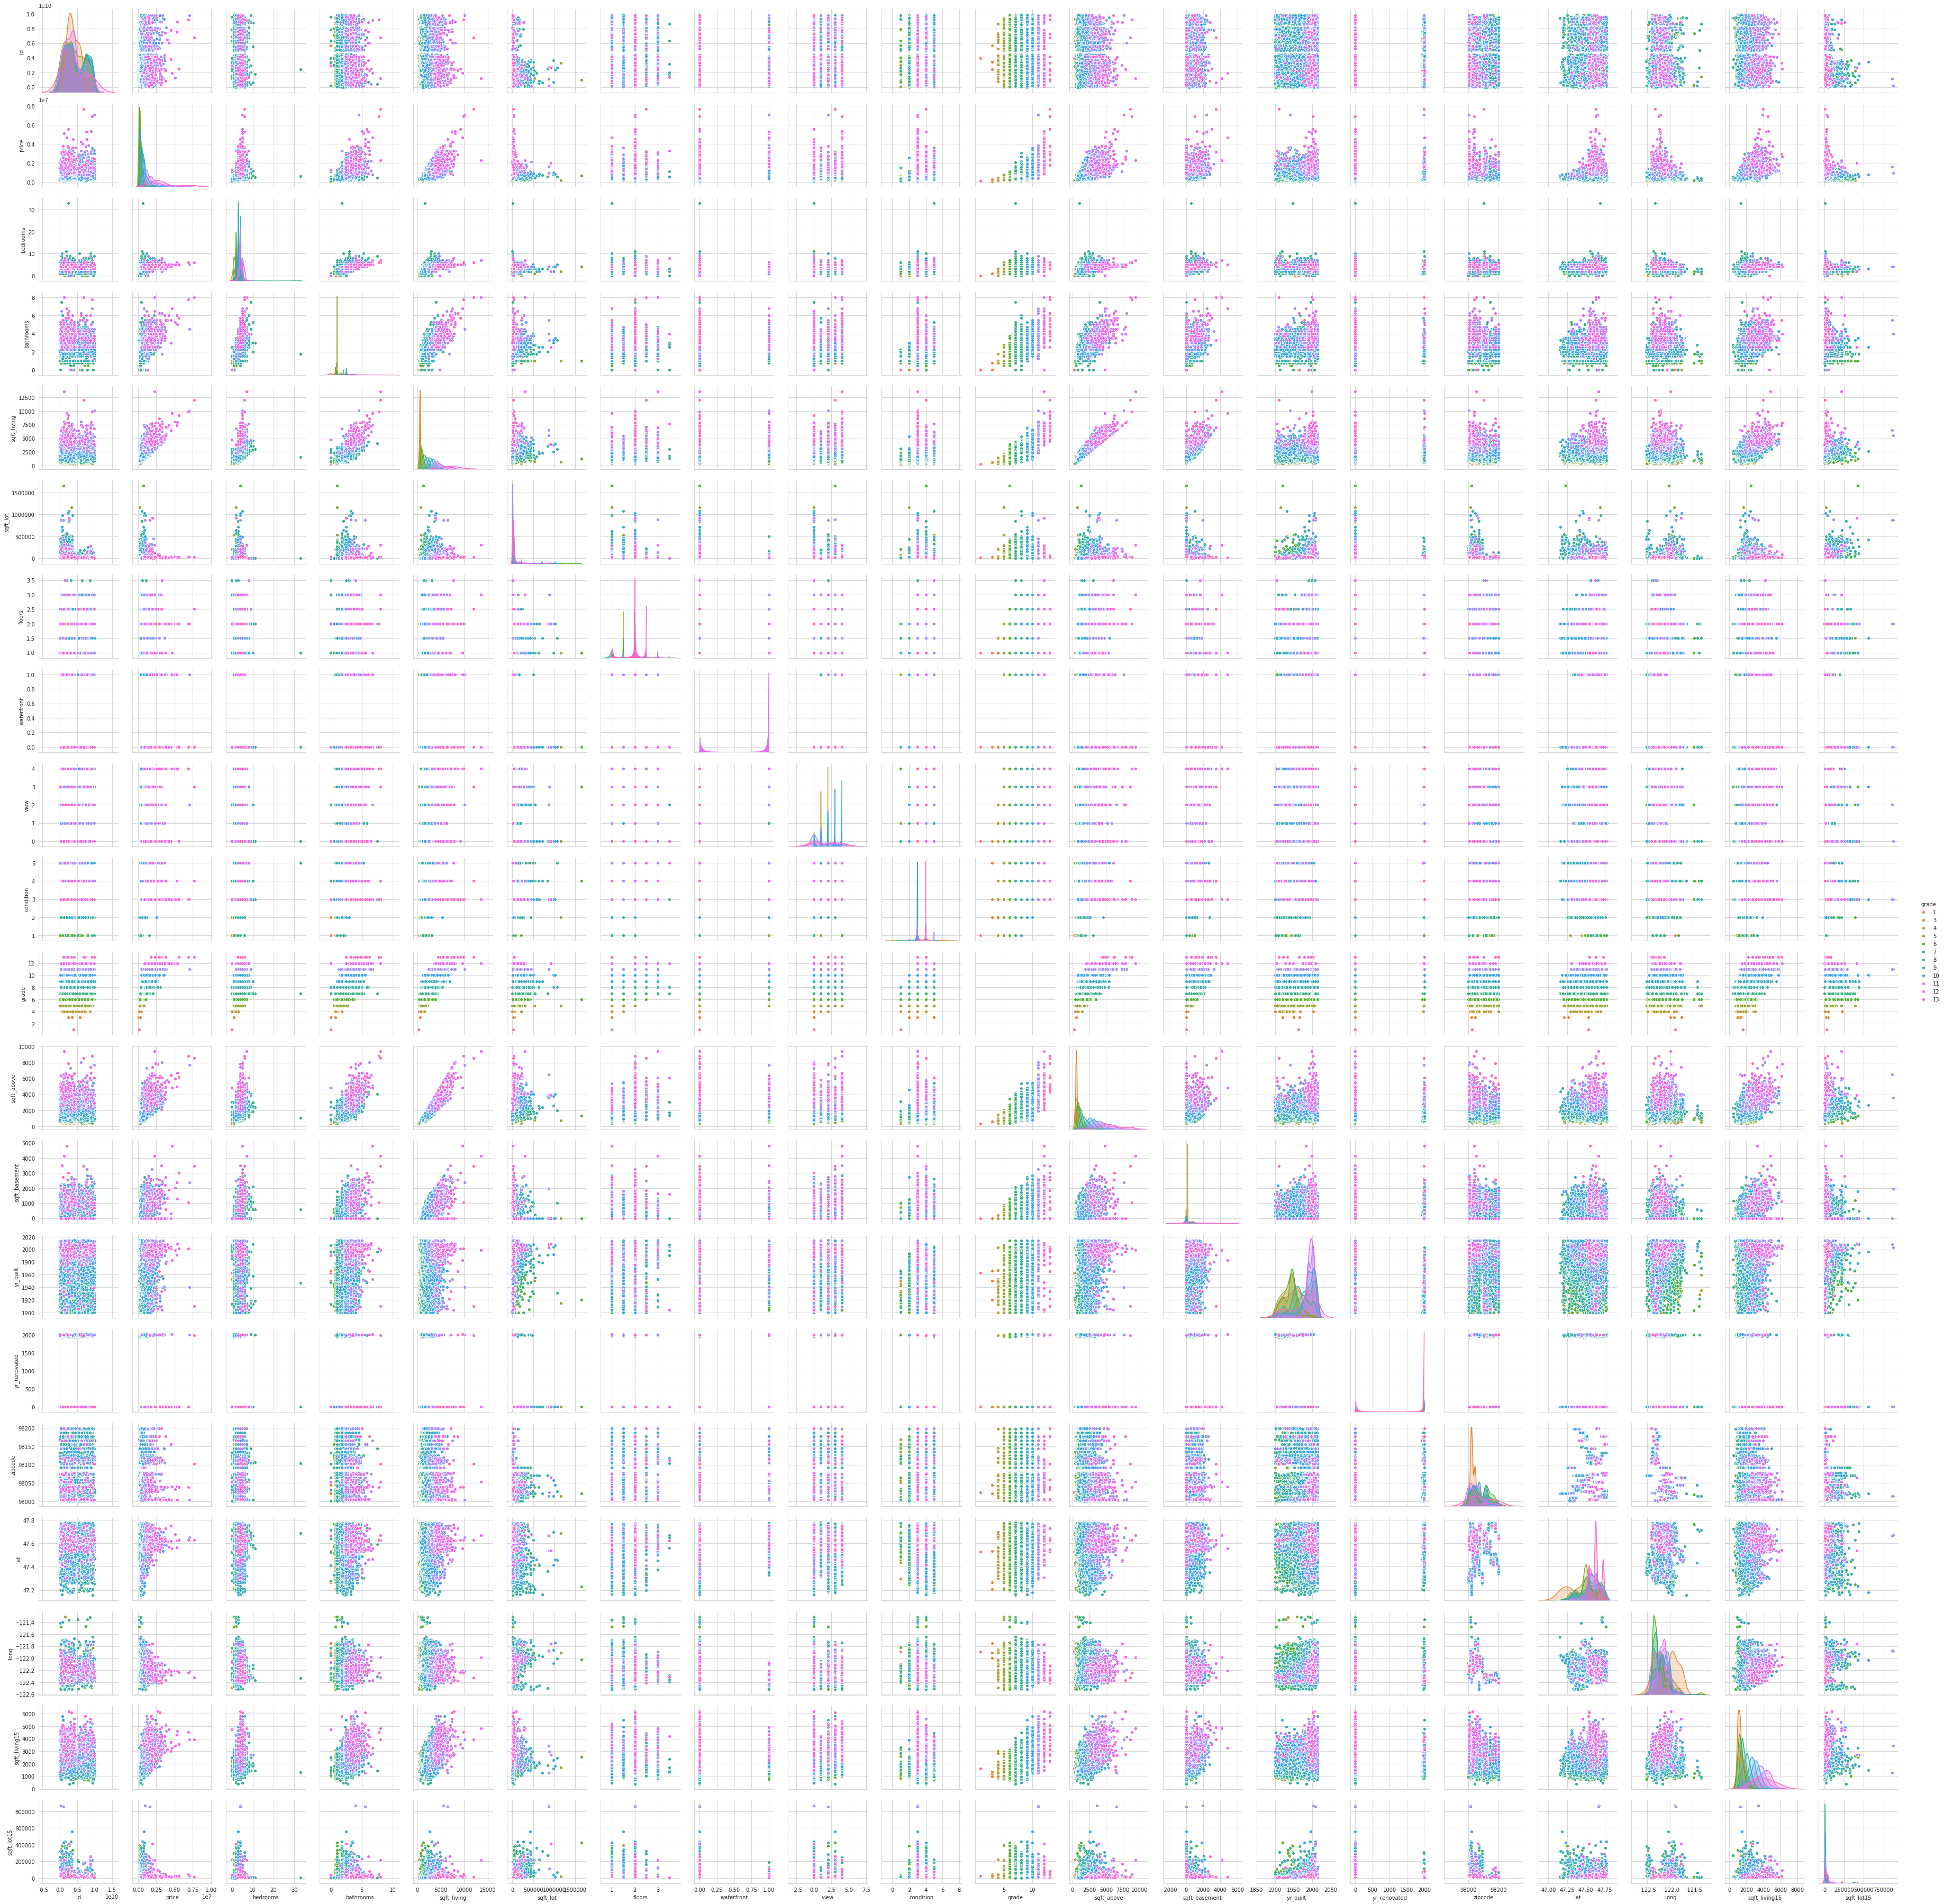

In [212]:
g = sns.pairplot(data, hue="grade")


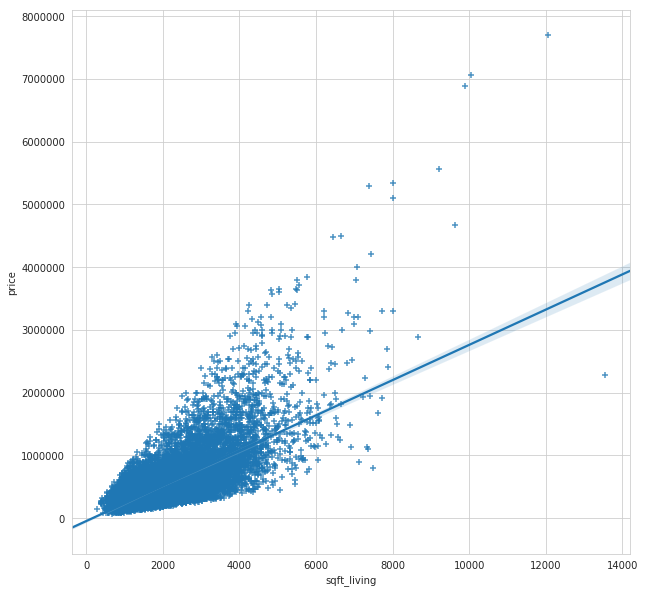

In [213]:
plt.figure(figsize=(10,10))

ax = sns.regplot(x=data['sqft_living'], y=data['price'], marker="+")


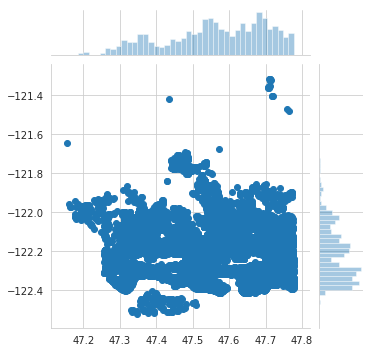

In [214]:
ax = sns.jointplot(x=data['lat'].values, y=data['long'].values,size = 5)


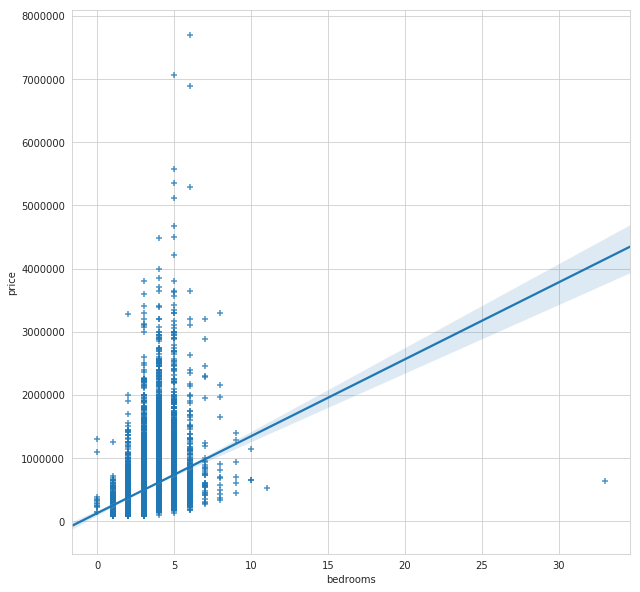

In [215]:
plt.figure(figsize=(10,10))

ax = sns.regplot(x=data['bedrooms'], y=data['price'], marker="+")


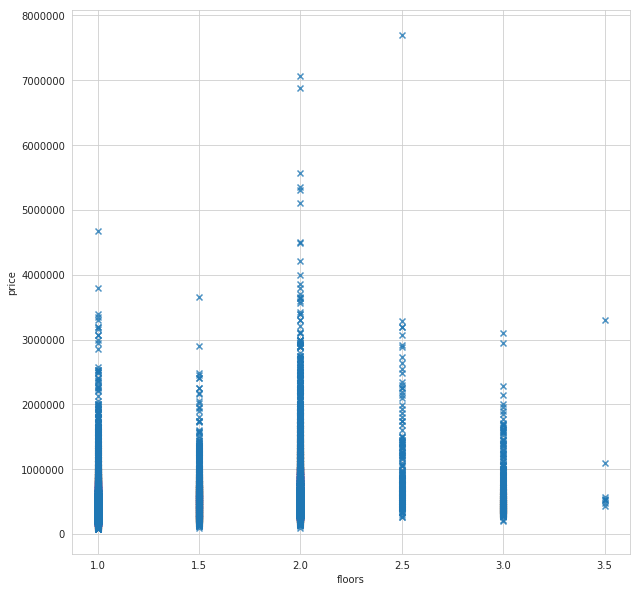

In [217]:
plt.figure(figsize=(10,10))
ax = sns.regplot(x=data['floors'], y=data['price'], marker="x",fit_reg=False)

# 3.0 Data Preparation

In [5]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [6]:
data = data.drop('id',axis=1)

In [7]:
data['date'] = pd.to_datetime(data['date'])



In [8]:
data.price = data.price.astype(int)
data.bathrooms = data.bathrooms.astype(int)
data.floors = data.floors.astype(int)

In [9]:
data.head()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900         3          1         1180      5650       1   
1 2014-12-09  538000         3          2         2570      7242       2   
2 2015-02-25  180000         2          1          770     10000       1   
3 2014-12-09  604000         4          3         1960      5000       1   
4 2015-02-18  510000         3          2         1680      8080       1   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [10]:
data["house_age"] = data["date"].dt.year - data['yr_built']


In [11]:
data=data.drop('date', axis=1)
data=data.drop('yr_renovated', axis=1)
data=data.drop('yr_built', axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null int64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null int64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
house_age        21613 non-null int64
dtypes: float64(2), int64(16)
memory usage: 3.0 MB


In [13]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900         3          1         1180      5650       1           0   
1  538000         3          2         2570      7242       2           0   
2  180000         2          1          770     10000       1           0   
3  604000         4          3         1960      5000       1           0   
4  510000         3          2         1680      8080       1           0   

   view  condition  grade  sqft_above  sqft_basement  zipcode      lat  \
0     0          3      7        1180              0    98178  47.5112   
1     0          3      7        2170            400    98125  47.7210   
2     0          3      6         770              0    98028  47.7379   
3     0          5      7        1050            910    98136  47.5208   
4     0          3      8        1680              0    98074  47.6168   

      long  sqft_living15  sqft_lot15  house_age  
0 -122.257           1340        5650         59  
1 -122.319           1690        7639         63  
2 -122.233           2720        8062         82  
3 -122.393           1360        5000         49  
4 -122.045           1800        7503         28

In [14]:
x = [data] 

In [15]:
data=data.drop('zipcode', axis=1)

In [16]:
data.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      1.749734   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.734873    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.000000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.000000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.000000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.446213      0.007542      0.234303      3.409430      7.656873   
std        0.551894      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.000000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.000000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement           lat          long  sqft_living15  \
count  21613.000000   21613.000000  21613.000000  21613.000000   21613.000000   
mean    1788.390691     291.509045     47.560053   -122.213896    1986.552492   
std      828.090978     442.575043      0.138564      0.140828     685.391304   
min      290.000000       0.000000     47.155900   -122.519000     399.000000   
25%     1190.000000       0.000000     47.471000   -122.328000    1490.000000   
50%     1560.000000       0.000000     47.571800   -122.230000    1840.000000   
75%     2210.000000     560.000000     47.678000   -122.125000    2360.000000   
max     9410.000000    4820.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15     house_age  
count   21613.000000  21613.000000  
mean    12768.455652     43.317818  
std     27304.179631     29.375493  
min       651.000000     -1.000000  
25%      5100.000000     18.000000  
50%      7620.000000     40.000000  
75%     10083.000000     63.000000  
max    871200.000000    115.000000

In [17]:
data = data.drop('sqft_above',axis=1)

In [18]:
data = data.drop('sqft_basement',axis=1)

In [19]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900         3          1         1180      5650       1           0   
1  538000         3          2         2570      7242       2           0   
2  180000         2          1          770     10000       1           0   
3  604000         4          3         1960      5000       1           0   
4  510000         3          2         1680      8080       1           0   

   view  condition  grade      lat     long  sqft_living15  sqft_lot15  \
0     0          3      7  47.5112 -122.257           1340        5650   
1     0          3      7  47.7210 -122.319           1690        7639   
2     0          3      6  47.7379 -122.233           2720        8062   
3     0          5      7  47.5208 -122.393           1360        5000   
4     0          3      8  47.6168 -122.045           1800        7503   

   house_age  
0         59  
1         63  
2         82  
3         49  
4         28

In [20]:
f = 6.450000e+05

In [21]:
filt =  (data['price'] <= f) & (data['bedrooms'] <= 11)

In [22]:
data = data.loc[filt]

In [23]:
data.bedrooms.unique()


array([ 3,  2,  4,  5,  1,  6,  7,  8,  0,  9, 11])

In [24]:
data.bathrooms.unique()

array([1, 2, 3, 0, 4, 5, 7])

In [25]:
data.apply(pd.Series.nunique)


price            2537
bedrooms           11
bathrooms           7
sqft_living       769
sqft_lot         7698
floors              3
waterfront          2
view                5
condition           5
grade              10
lat              4842
long              734
sqft_living15     603
sqft_lot15       6819
house_age         117
dtype: int64

In [26]:
data.bathrooms.unique()

array([1, 2, 3, 0, 4, 5, 7])

In [27]:
data.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  0,  9, 11])

In [28]:
data['price'] = np.log(data['price'])

In [29]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  12.309982         3          1         1180      5650       1           0   
1  13.195614         3          2         2570      7242       2           0   
2  12.100712         2          1          770     10000       1           0   
3  13.311329         4          3         1960      5000       1           0   
4  13.142166         3          2         1680      8080       1           0   

   view  condition  grade      lat     long  sqft_living15  sqft_lot15  \
0     0          3      7  47.5112 -122.257           1340        5650   
1     0          3      7  47.7210 -122.319           1690        7639   
2     0          3      6  47.7379 -122.233           2720        8062   
3     0          5      7  47.5208 -122.393           1360        5000   
4     0          3      8  47.6168 -122.045           1800        7503   

   house_age  
0         59  
1         63  
2         82  
3         49  
4         28

In [30]:
X = data
Y = X['price'].values
X = X.drop('price', axis = 1).values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)


In [117]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  12.309982         3          1         1180      5650       1           0   
1  13.195614         3          2         2570      7242       2           0   
2  12.100712         2          1          770     10000       1           0   
3  13.311329         4          3         1960      5000       1           0   
4  13.142166         3          2         1680      8080       1           0   

   view  condition  grade      lat     long  sqft_living15  sqft_lot15  \
0     0          3      7  47.5112 -122.257           1340        5650   
1     0          3      7  47.7210 -122.319           1690        7639   
2     0          3      6  47.7379 -122.233           2720        8062   
3     0          5      7  47.5208 -122.393           1360        5000   
4     0          3      8  47.6168 -122.045           1800        7503   

   house_age  
0         59  
1         63  
2         82  
3         49  
4         28

In [118]:
X_test

array([[4.000e+00, 2.000e+00, 1.710e+03, ..., 1.710e+03, 3.500e+03,
        0.000e+00],
       [4.000e+00, 1.000e+00, 1.750e+03, ..., 1.640e+03, 5.500e+03,
        8.800e+01],
       [2.000e+00, 2.000e+00, 1.280e+03, ..., 1.290e+03, 2.900e+03,
        8.000e+00],
       ...,
       [3.000e+00, 2.000e+00, 2.530e+03, ..., 2.530e+03, 9.469e+03,
        2.400e+01],
       [3.000e+00, 1.000e+00, 1.320e+03, ..., 1.480e+03, 5.250e+03,
        5.900e+01],
       [3.000e+00, 1.000e+00, 1.310e+03, ..., 1.310e+03, 8.748e+03,
        3.800e+01]])

In [119]:
Y_test

array([12.55284876, 13.03898177, 12.76568843, ..., 12.60903462,
       12.94800999, 12.98768847])

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

## Gradient Boosting Regressor

In [121]:
reg = GradientBoostingRegressor()
kfold = KFold(n_splits=15, random_state=21)
cv_results = cross_val_score(reg, X_train,Y_train, cv=kfold, scoring='r2')

print(cv_results)
round(np.mean(cv_results)*100, 2)




[0.77777419 0.75443379 0.7617047  0.8140889  0.75123047 0.77591966
 0.74048838 0.76222338 0.79951924 0.79473328 0.81312996 0.7828187
 0.78521558 0.77918    0.76279954]


77.7

In [122]:
k_range = list(range(70,120))
print(k_range)

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [123]:
# create a parameter grid: map the parameter names to the values that should be searched
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_estimators=k_range)
print(param_grid)

{'n_estimators': [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]}


In [125]:
# instantiate the grid
grid = GridSearchCV(reg, param_grid, cv=kfold, scoring='r2')

In [127]:
# fit the grid with data
grid.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=21, shuffle=False),
       error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [128]:
#finding the best estimator for the model
best_fit = grid.best_estimator_

In [129]:
best_fit


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=119, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [131]:
reg = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,learning_rate=0.1, loss='ls', max_depth=3, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0,  min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,  n_estimators=119, n_iter_no_change=None, presort='auto',random_state=None, subsample=1.0, tol=0.0001,validation_fraction=0.1, verbose=0, warm_start=False)
kfold = KFold(n_splits=15, random_state=21)
cv_results = cross_val_score(reg, X_train,Y_train, cv=kfold, scoring='r2')

print(cv_results)
round(np.mean(cv_results)*100, 2)


[0.780249   0.75795415 0.76495034 0.81785011 0.7543735  0.78016223
 0.74296528 0.76842729 0.80295318 0.79739119 0.81734245 0.78665466
 0.78976866 0.7836701  0.76707793]


78.08

In [132]:
reg.fit(X_train, Y_train)
score = reg.score(X_test,Y_test)
print("r2 score is {}".format(score*100))

r2 score is 77.75515977696703


In [133]:
pred = reg.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
print('RMSE is ' , error)

RMSE is  0.16706002480524204


## K Nearest Neighbour

In [70]:
reg = KNeighborsRegressor()
kfold = KFold(n_splits=15, random_state=21)
cv_results = cross_val_score(reg, X_train, Y_train, cv=kfold, scoring='r2')

print(cv_results)

round(np.mean(cv_results)*100, 2)




[0.29867016 0.33473229 0.3641857  0.27376192 0.30477621 0.29155349
 0.33365386 0.25598383 0.30663534 0.33125844 0.27788739 0.3380285
 0.25153679 0.33179096 0.32220354]


30.78

## Tuning Knn

In [105]:
k_range = list(range(5,70))
print(k_range)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]


In [72]:
# create a parameter grid: map the parameter names to the values that should be searched
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]}


In [73]:
# instantiate the grid
grid = GridSearchCV(reg, param_grid, cv=kfold, scoring='r2')

In [74]:
# fit the grid with data
grid.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=21, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [75]:
#finding the best estimator for the model
best_fit = grid.best_estimator_

In [76]:
best_fit

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=23, p=2,
          weights='uniform')

In [56]:
reg = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=23, p=2,weights='uniform')
kfold = KFold(n_splits=15, random_state=21)
cv_results = cross_val_score(reg, X_train, Y_train, cv=kfold, scoring='r2')

print(cv_results)

round(np.mean(cv_results)*100, 2)


[0.37617519 0.42259977 0.40881034 0.3451731  0.38417812 0.35349274
 0.39949973 0.36006364 0.37748184 0.37336309 0.34810266 0.37826604
 0.36020928 0.39424032 0.39473302]


37.84

In [60]:
reg.fit(X_train, Y_train)
score = reg.score(X_test,Y_test)
print("r2 score is {}".format(score*100))

r2 score is 35.93833024668002


In [94]:
pred = reg.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
print('RMSE is ' , error)

RMSE is  0.33193522266420555


## Linear regression

In [79]:
reg = LinearRegression()
kfold = KFold(n_splits=15, random_state=21)
cv_results = cross_val_score(reg, X_train, Y_train, cv=kfold, scoring='r2')

print(cv_results)

round(np.mean(cv_results)*100, 2)

[0.47515124 0.46727651 0.45464017 0.45518306 0.47833768 0.46844921
 0.48108942 0.47841568 0.47691611 0.4863641  0.45103485 0.51500328
 0.44100606 0.49685041 0.48486333]


47.4

In [80]:
reg.fit(X_train, Y_train)
score = reg.score(X_test,Y_test)
print("r2 score is {}".format(score*100))

r2 score is 49.021538011650314


In [81]:
pred = reg.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
print('RMSE is ' , error)

RMSE is  0.29610625146240893


## Random Forest Regressor

In [107]:
regr = RandomForestRegressor()
cv_results = cross_val_score(regr,X_train, Y_train, cv=kfold,scoring='r2' )
print(cv_results)

round(np.mean(cv_results)*100, 2)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nbuser/anaconda3_501/l

[0.85207566 0.85717348 0.84350908 0.85043885 0.85392329 0.83671517
 0.85741705 0.84379284 0.83128408 0.8589345  0.84450739 0.83792062
 0.85260123 0.82492619 0.8551834 ]


84.67

## Tuning Random Forest Regressor

In [83]:
k_range = list(range(5,70))
print(k_range)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]


In [84]:
# create a parameter grid: map the parameter names to the values that should be searched
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_estimators=k_range)
print(param_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]}


In [87]:
# instantiate the grid
grid = GridSearchCV(regr, param_grid, cv=kfold, scoring='r2')

In [88]:
# fit the grid with data
grid.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=21, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [89]:
#finding the best estimator for the model
best_fit = grid.best_estimator_

In [90]:
best_fit

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=62, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [82]:
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,max_features='auto', max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=62, n_jobs=None,oob_score=False, random_state=None, verbose=0, warm_start=False)
cv_results = cross_val_score(regr,X_train, Y_train, cv=kfold,scoring='r2' )
print(cv_results)

round(np.mean(cv_results)*100, 2)

[0.80723225 0.81751922 0.83603092 0.80194681 0.83619108 0.79777638
 0.80102972 0.83065993 0.82176667 0.81303185 0.7920698  0.79718336
 0.80492283 0.84618703 0.80723612]


81.41

In [83]:
regr.fit(X_train, Y_train)
score = regr.score(X_test,Y_test)
print("r2 score is {}".format(score*100))

r2 score is 81.8366687556274


In [84]:
pred = regr.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
print('RMSE is ' , error)

RMSE is  0.17674696442505466


# Decision Tree Regressor 

In [85]:
regressor = DecisionTreeRegressor()
kfold = KFold(n_splits=15, random_state=21)
cv_results = cross_val_score(regressor,X_train, Y_train, cv=kfold,scoring='r2' )
print(cv_results)

round(np.mean(cv_results)*100, 2)

[0.63721811 0.63295385 0.6668822  0.63755957 0.67712134 0.63480005
 0.65876273 0.6560463  0.65814323 0.67569639 0.63492393 0.57715838
 0.65081428 0.65657732 0.62569727]


64.54

## Tuning Decsion Tree Regressor

In [92]:
k_range = list(range(5,30))
print(k_range)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [93]:
# create a parameter grid: map the parameter names to the values that should be searched
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(max_depth=k_range)
print(param_grid)

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}


In [94]:
# instantiate the grid
grid = GridSearchCV(regressor, param_grid, cv=kfold, scoring='r2')

In [95]:
# fit the grid with data
grid.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=21, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [96]:
#finding the best estimator for the model
best_fit = grid.best_estimator_

In [97]:
best_fit

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [86]:
regressor = DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,max_leaf_nodes=None, min_impurity_decrease=0.0,min_impurity_split=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,presort=False, random_state=None, splitter='best')
kfold = KFold(n_splits=15, random_state=21)
cv_results = cross_val_score(regressor,X_train, Y_train, cv=kfold,scoring='r2' )
print(cv_results)

round(np.mean(cv_results)*100, 2)

[0.73364218 0.71844801 0.75111685 0.73960181 0.77630143 0.72392569
 0.73646156 0.74204216 0.7559222  0.753616   0.71759399 0.68558202
 0.75733945 0.74656316 0.70378815]


73.61

In [87]:
regressor.fit(X_train, Y_train)
scores = reg.score(X_test,Y_test)
print("r2 score is {}".format(scores*100))

r2 score is 49.021538011650314


In [88]:
pred = regressor.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
print('RMSE is ' , error)

RMSE is  0.21012494144911437


## Most important feature

In [33]:
from sklearn.feature_selection import SelectFromModel

In [35]:
sel = SelectFromModel(GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,learning_rate=0.1, loss='ls', max_depth=3, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0,  min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,  n_estimators=119, n_iter_no_change=None, presort='auto',random_state=None, subsample=1.0, tol=0.0001,validation_fraction=0.1, verbose=0, warm_start=False))
sel.fit(X_train,Y_train)

SelectFromModel(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [36]:
sel.get_support()


array([False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False])

In [37]:
sel

SelectFromModel(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [38]:
feat_labels = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','lat','long', 'sqft_living15', 'sqft_lot15', 'house_age']

In [39]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'house_age'],
      dtype='object')

In [40]:
# Create a random forest classifier
reg = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,learning_rate=0.1, loss='ls', max_depth=3, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0,  min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,  n_estimators=119, n_iter_no_change=None, presort='auto',random_state=None, subsample=1.0, tol=0.0001,validation_fraction=0.1, verbose=0, warm_start=False)


# Train the classifier
reg.fit(X_train, Y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, reg.feature_importances_):
    print(feature)


('bedrooms', 0.00046601529620707803)
('bathrooms', 0.0019165164279558071)
('sqft_living', 0.29527261178236286)
('sqft_lot', 0.017984088352306422)
('floors', 7.180383868983749e-05)
('waterfront', 0.0007200780233188997)
('view', 0.0073658005327875385)
('condition', 0.009744694905834477)
('grade', 0.08676705951057294)
('lat', 0.46821268724081194)
('long', 0.04271516200444887)
('sqft_living15', 0.04964307597307967)
('sqft_lot15', 0.010407103501992426)
('house_age', 0.00871330260963145)


In [41]:
# Create a selector object that will use the random forest to identify
# features that have an importance of more than 0.125
sfm = SelectFromModel(reg, threshold=0.125)

In [42]:
sfm.fit(X_train, Y_train)

SelectFromModel(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.125)

In [45]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

sqft_living
lat


# Questions to answer


# How do you represent your data as features?

I convert my data to the respective datatypes then i processed my data. i also did data cleansing so that my data explain my respective features better.

# Did you process the data in anyway ?
firstly i dropped the id column, then i convert the date to datetime format, convert the data type of price, bathrooms, floors to integer. I created a new variable
call house age by minusing the time it was built and the year it was sold. 
Then i divide the price of houses in redmond and seatle by 2 to account for the housing price inflation in the area indirectly cause by the tech companies. then i droped
sqft abovee and basement as it is roughlythe same. i filter the price of houses whereby if price is bigger than 5.302000e+05	 , then it will not be included. This is done
as it is the 75% mark of the price, to remove outliers. i also filter the bedrooms such that any houses with bedrooms more than 11 is removed as it is an outlier 
as most houses dont have 11 bedrooms.Then i log the price to reduce outliers 

# Did you use any additional datasets?
-no , i did not use any additional datasets.

# How did you select which learning algorithms to use?
- I tried 5 algorithms on the same dataset and picked the 1 with the highest cv mean r2 score after tuning. I also took into consideration of the predicted r2 score and how much it differs from the cv score, and also i took consideration of the RMSE of the model ( how much the predicted value varies from the actual value).
I also did research on the respective learning algorithms that would suit my scenerio (price prediction model) the best.

## Did you try to tune the hyperparameters of the learning algorithm, and in that case how?
-Yes i tuned the learning algorithm with GridsearchCV, from the range of parameters from a wide variety of numbers to find out the optimal results. It took awhile to loop though and find the best model (roughly 30 minutes if im having good connection).

## How do you evaluate the quality of your system?

To evaluate the quality of my system, i used k-fold cross validation whereby k = 15, because through trial and error, i prefer to use k as 15. k-fold cross validation (according to documentations)(i wll link it in the research) is where u shuffle datasets randomly, and put the dataset in k groups,and for each unique group,take the group as a hold out or test data set,take the remaining groups as a training data set.Fit a model on the training set and evaluate it on the test set.Retain the evaluation score and discard the model.Summarize the skill of the model using the sample of model evaluation scores. I also use random state = 21 so everytime i train the model i ensure that the random numbers are generated in the same order. I also compare the actual predicted value with the cv score to show how much it differs from it. the closer the predicted score to the cv score the better. I also took 
in consideration of the Root mean square error to show how much the predicted value differs from the actual value. All this is done to prevent overfitting and underfitting of the model.



# How well does your system compare to a stupid baseline?
i do not know how to evaluate the stupidbase line. I tried creating a kaggle competition but i dont how to.

## Can you say anything about the errors that the system makes?

I used root mean square error to estimate the average of squares of the errors, which measures the average squared difference between the estimated values and the actual value. If Mean square error is large, it means that the data values are dispersed widely around the mean, and a smaller MSE means otherwise and it is better as it meanas that the  data values are dispersed closely to the mean, which means the the model is fitted. but if RMSE is too low then it might mean overfitting.

## Is it possible to say something about which features the model considers important?

yes, it is possble. my random forest model says that sqft_living and latitude is the most important feature that my model considers important

## research done 

King County is a county located in the U.S. state of Washington. The population was 2,252,782 in the 2019 census estimate, making it the most populous county in Washington, and the 12th-most populous in the United States. The county seat is Seattle, also the state's most populous city. Cities in king county include seattle , redmond which are home to some of the most popular tech companies in the world, which actually inflates the cost of living,mainly the price of housing and basic necessites. The Housing cost in Redmond is roughly 2 times of the rest of the cities in washington and 3 times than the rest of usa. Redmond is home to microsoft and  Amazon aws office,which could be responsible for the high cost of housing there with competition of workers trying to get a house in the city to go to work conveniently. Seattle is home to Amazon HQ which responsible for the high cost of housing and living there. Houses in seattle is almost roughly 2 times of the rest of the cities in washington and 3 times the rest of usa. In both cities, housing is the biggest factor in cost of living difference.

Locations, home size and usable spaces, views, have a important factors on the price of housing. The bigger the home size and usable spaces the higher the price of house is. With a beautiful view outside of the house, the house price naturally increases as well


Economic factors not included in the dataset such as, inflation and interests rates have known to impact the price of housing too. when the interests rates are low, it is easier to take a loan from a bank to make big purchases such as houses, as such, prices of housing can vary differently throughout different economic times.



links used:

https://www.kingcounty.gov/depts/health/codes/cities.aspx

https://www.bestplaces.net/cost_of_living/city/washington/redmond

https://www.bestplaces.net/cost_of_living/city/washington/seattle

https://www.opendoor.com/w/blog/factors-that-influence-home-value